In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    phase,
    SUM(total_extras) AS extras
FROM extras_summary
GROUP BY phase
ORDER BY extras DESC
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\789258766.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,extras
0,Middle,297.0
1,powerplay,258.0
2,Death,218.0


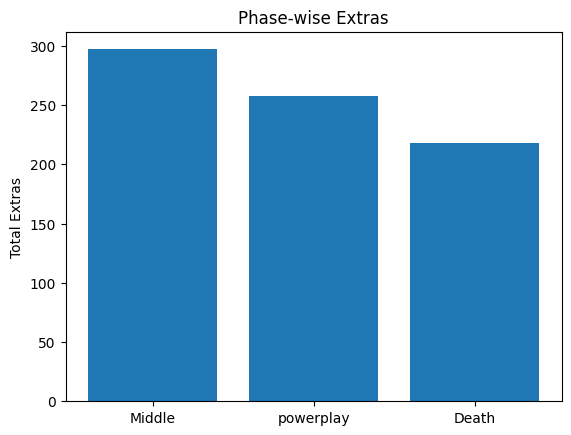

In [3]:
plt.figure()
plt.bar(df["phase"], df["extras"])
plt.ylabel("Total Extras")
plt.title("Phase-wise Extras")
plt.show()


In [4]:
query = """
SELECT
    t.team_name,
    SUM(es.total_extras) AS extras_conceded
FROM extras_summary es
JOIN team t ON es.bowler_id IN (
    SELECT player_id FROM player WHERE team_id = t.team_id
)
GROUP BY t.team_name
ORDER BY extras_conceded DESC
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\3885903421.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,team_name,extras_conceded
0,Rajasthan Royals,116.0
1,Mumbai Indians,87.0
2,Chennai Super Kings,84.0
3,Lucknow Super Giants,80.0
4,Delhi Capitals,79.0
5,Gujarat Titans,79.0
6,Sunrisers Hyderabad,76.0
7,Punjab Kings,65.0
8,Royal Challengers Bengaluru,59.0
9,Kolkata Knight Riders,48.0


In [5]:
query = """
SELECT
    p.player_name AS bowler,
    SUM(es.total_extras) AS extras
FROM extras_summary es
JOIN player p ON es.bowler_id = p.player_id
GROUP BY p.player_name
ORDER BY extras DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\812770471.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,extras
0,JC Archer,35.0
1,Mohammed Siraj,34.0
2,MA Starc,33.0
3,M Pathirana,33.0
4,M Theekshana,25.0
5,SN Thakur,23.0
6,Mohammed Shami,22.0
7,Sandeep Sharma,22.0
8,TU Deshpande,20.0
9,HV Patel,20.0


In [6]:
query = """
SELECT
    SUM(wides) AS wides,
    SUM(no_balls) AS no_balls,
    SUM(byes) AS byes,
    SUM(leg_byes) AS leg_byes
FROM extras_summary
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\3488796703.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,wides,no_balls,byes,leg_byes
0,460.0,42.0,21.0,124.0


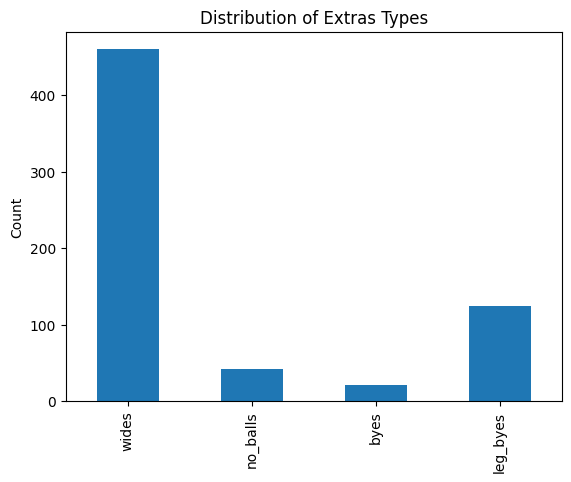

In [7]:
df.T.plot(kind="bar", legend=False)
plt.ylabel("Count")
plt.title("Distribution of Extras Types")
plt.show()


In [8]:
query = """
SELECT
    phase,
    SUM(wides) AS wides,
    SUM(no_balls) AS no_balls,
    SUM(byes) AS byes,
    SUM(leg_byes) AS leg_byes
FROM extras_summary
GROUP BY phase
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\2334036667.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,wides,no_balls,byes,leg_byes
0,Middle,188.0,13.0,10.0,45.0
1,Death,140.0,11.0,6.0,36.0
2,powerplay,132.0,18.0,5.0,43.0


C:\Users\hp\AppData\Local\Temp\ipykernel_10504\2700436363.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


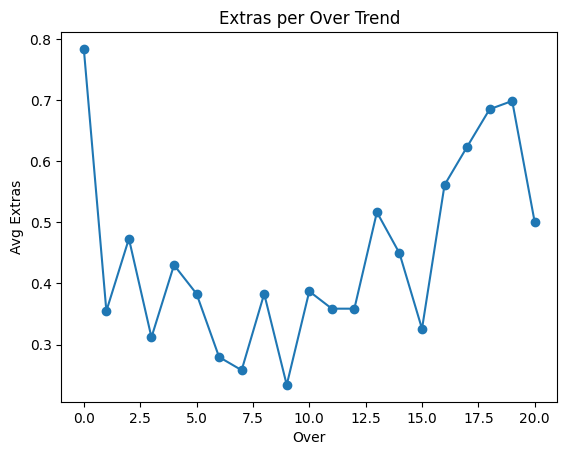

In [9]:
query = """
SELECT
    over_number,
    AVG(total_extras) AS avg_extras
FROM extras_summary
GROUP BY over_number
ORDER BY over_number
"""
df = pd.read_sql(query, conn)

plt.figure()
plt.plot(df["over_number"], df["avg_extras"], marker="o")
plt.xlabel("Over")
plt.ylabel("Avg Extras")
plt.title("Extras per Over Trend")
plt.show()
